# Part a) Optimization methods

In [58]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import self-made modules
from project2_code import simple_polynomial, create_design_matrix_1d, gradient_descent

### Make and prepare the data

In [59]:
n = 1000
np.random.seed(1)
x = np.random.rand(n)

# Create polynomial function of x, up to a degree of 5
y = simple_polynomial(x, polynomial_degree = 2)

# Create design matrix
X = create_design_matrix_1d(x, 2)
X.insert(0, 'bias', 1)

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

## Gradient descent with momentum

In [49]:
max_iterations = 1000   # maximum iterations for gradient descent
learning_rates = [0.01, 0.1, 0.5]  # learning rates to test
save_fig = True 

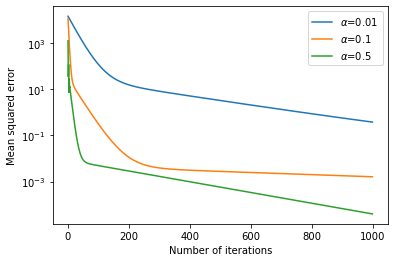

In [53]:
for learning_rate in learning_rates:
    coeff, cost = gradient_descent(X_train, y_train, alpha=learning_rate, return_cost=True)
    plt.plot(range(max_iterations), cost,label=r'$\alpha$='+str(learning_rate))
    
plt.yscale('log');
plt.legend();
plt.xlabel('Number of iterations')
plt.ylabel('Mean squared error')
if save_fig:
    plt.savefig('..\\..\\output\\figures\\learning_rates_GD.jpg')

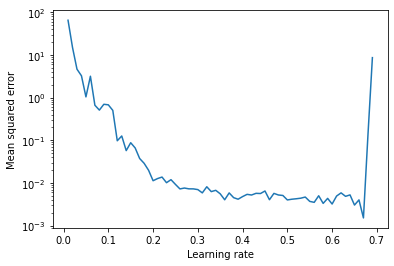

In [54]:
max_iterations = 100
costs = []

# Test learning_rates between 0.01 and 0.7
for learning_rate in np.arange(0.01, 0.7, 0.01):
    coeff, cost = gradient_descent(X_train, y_train, alpha=learning_rate, return_cost=True, max_iterations=max_iterations)
    costs.append(cost[-1])
    
plt.plot(np.arange(0.01, 0.7, 0.01), costs)
plt.yscale('log');
plt.xlabel('Learning rate');
plt.ylabel('Mean squared error');
if save_fig:
    plt.savefig('..\\..\\output\\figures\\best_learning_rate_GD.jpg')

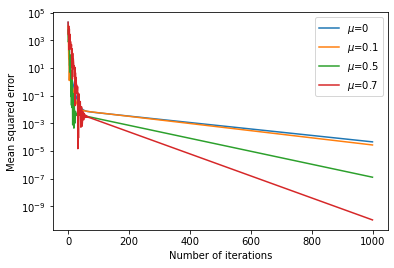

In [55]:
save_fig = True
momentums = [0, 0.1, 0.5, 0.7]
max_iterations = 1000
for momentum in momentums:
    coeff, cost = gradient_descent(X_train, y_train, alpha=0.5, return_cost=True, momentum_param=momentum, max_iterations=max_iterations)
    plt.plot(range(max_iterations), cost,label=r'$\mu$='+str(momentum))
    
plt.yscale('log');
plt.legend();
plt.xlabel('Number of iterations')
plt.ylabel('Mean squared error')
if save_fig:
    plt.savefig('..\\..\\output\\figures\\momentum_params_GD.jpg')

In [57]:
# Compare convergence when adding momentum
learning_rate=0.5
error_margin = 10E-6
interations_needed = []
momentum_parameters = [0, 0.1, 0.3, 0.7]
for momentum_param in momentum_parameters:
    coeff, cost = gradient_descent(X_train, y_train, alpha=learning_rate, max_iterations=2000, return_cost=True, momentum_param=momentum_param)
    num_iterations = sum(np.array(cost) > error_margin)
    interations_needed.append(num_iterations)

with open('..\\..\\output\\convergence_compare_GD.txt', 'w') as f:
    f.write(f'Comparing convergence GD with momentum. Learning rate: {learning_rate}. Convergence when error less than: {error_margin}  \n')
    for i in range(len(momentum_parameters)):
        f.write(f'Momentum parameter: {momentum_parameters[i]}. Convergence after {interations_needed[i]} iterations \n')

## Stochastic gradient descent